# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [52]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [53]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

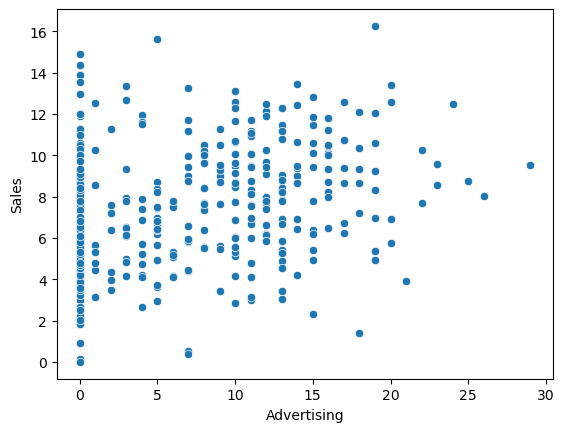

In [50]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

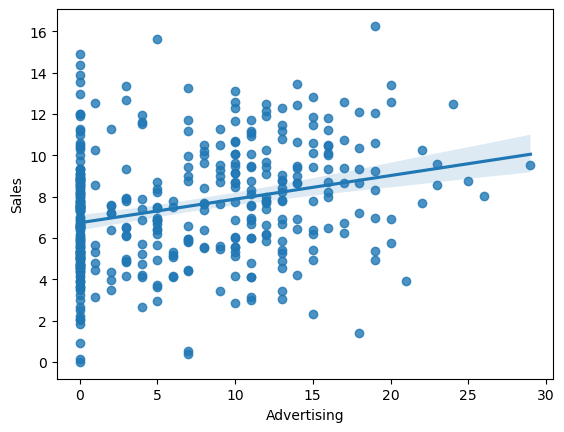

In [28]:
sns.regplot(x=var, y = target, data = data)
plt.show()

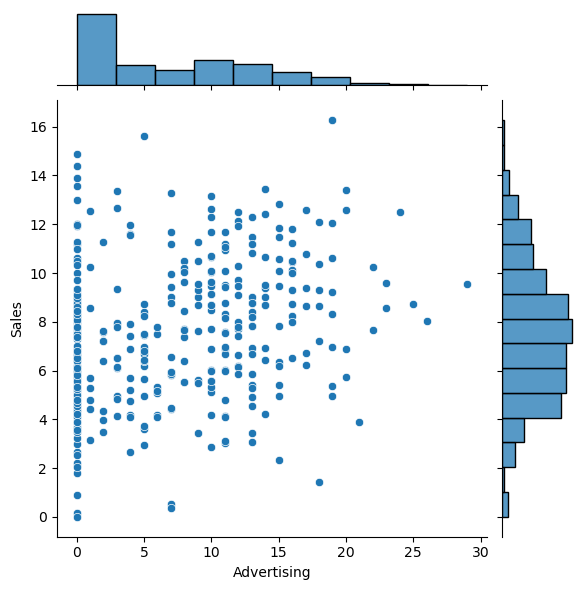

In [29]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [30]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 0을 빼고 다시 해봐야겠어요.
* 광고와 세일즈는 약한 상관관계가 있다.

In [56]:
# 함수 만들기
var = 'Advertising'

def eda2_nn(data, target, var):
    sns.scatterplot(x=var, y = target, data = data)
    plt.show()

    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

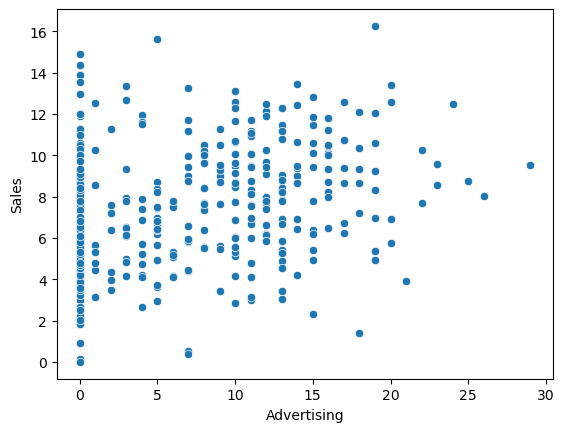

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


In [57]:
eda2_nn(data, target, var)

### (2) Population -> Sales

1) 시각화 : scatter

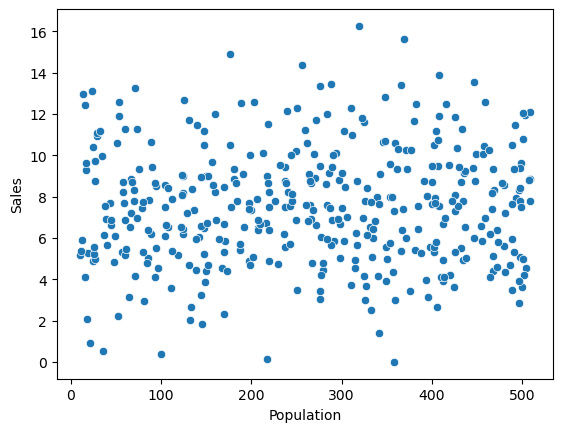

In [59]:
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

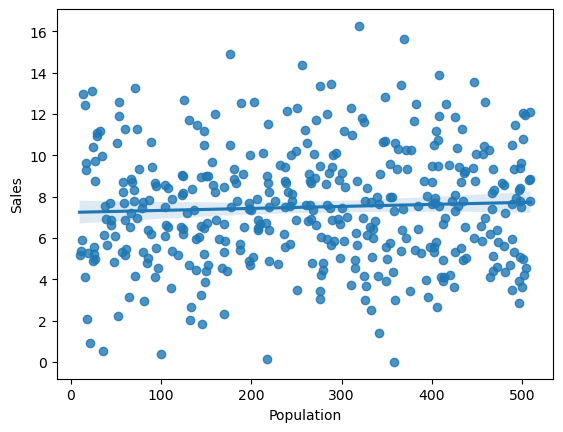

In [8]:
sns.regplot(x=var, y = target, data = data)
plt.show()

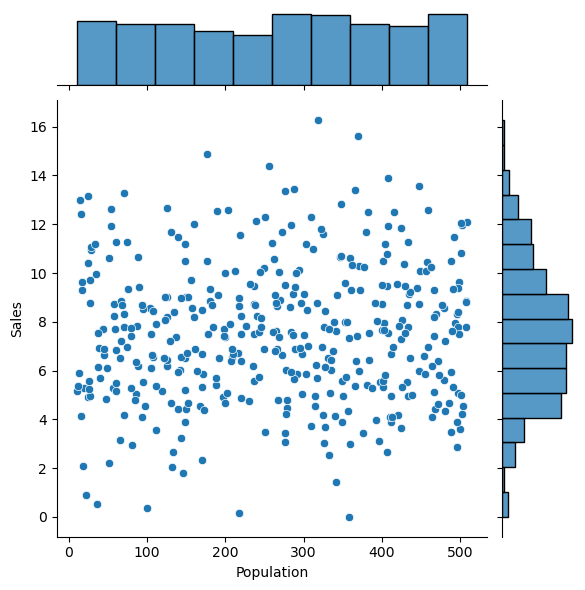

In [9]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [58]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


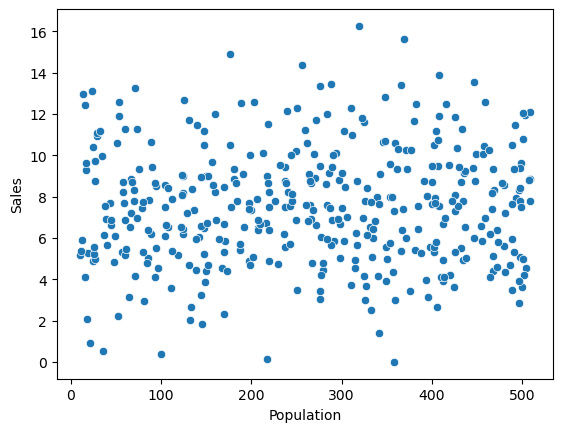

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


In [60]:
eda2_nn(data, target, var)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

인구수에 따른 판매량차이가 없어 보임.
이는 인구수가 많을 수록 판매량이 증가한다는 기본적인 생각과 다름. 즉, 카시트는 영유아기 아이들이 사용하며, 해당 부모들이 구매하기 때문에 인구수가 아니라 기혼인들의 수를 파악할 필요가 있음.

### (3) Price -> Sales

1) 시각화 : scatter

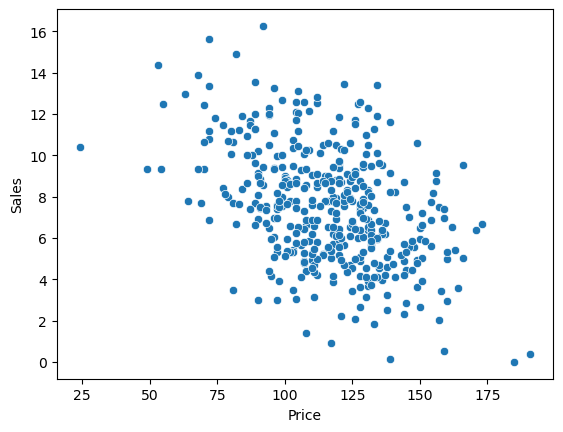

In [62]:
var = 'Price'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

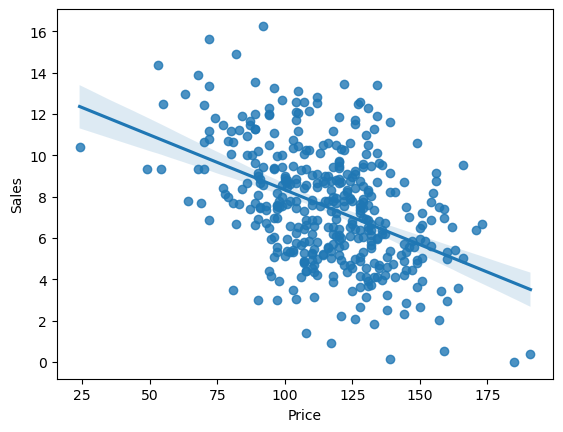

In [12]:
sns.regplot(x=var, y = target, data = data)
plt.show()

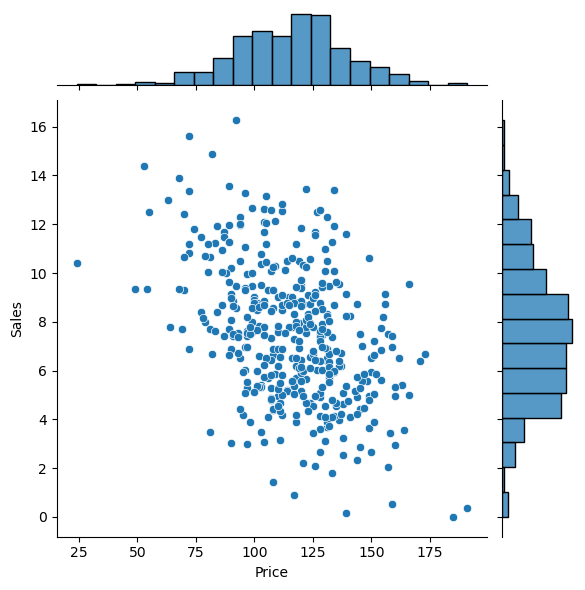

In [13]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [61]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


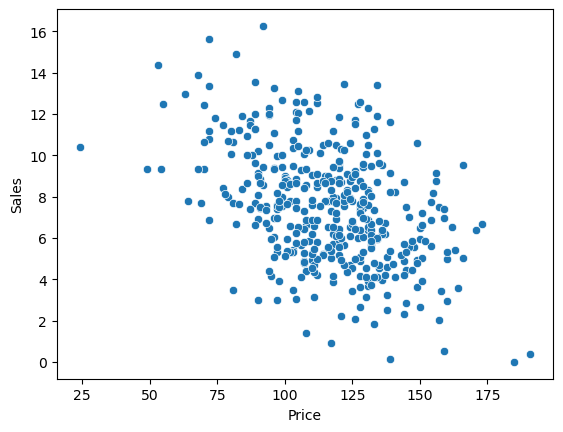

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


In [63]:
eda2_nn(data, target, var)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

상품 가격이 높을 수록 판매액은 감소, 상관관계는 수치상 강하지 않지만 상관관계가 있다.
p-value값이 0.05보다 작으므로 유의미하다.

**비지니스 측면**

가격대별 수익액율을 지정할 수 있다.

### (4) Age -> Sales

1) 시각화 : scatter

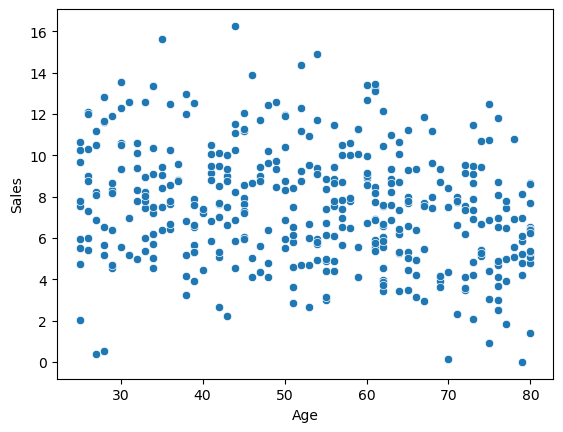

In [65]:
var = 'Age'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

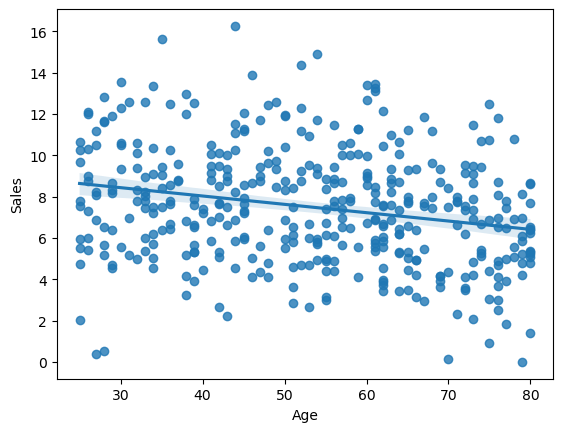

In [66]:
sns.regplot(x=var, y = target, data = data)
plt.show()

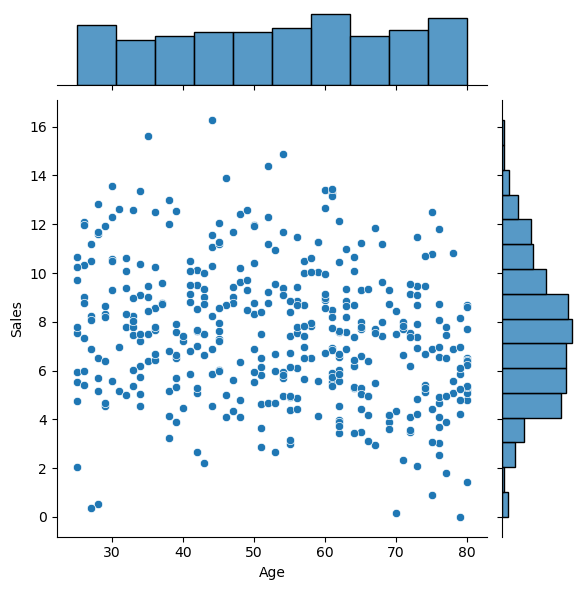

In [67]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [68]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


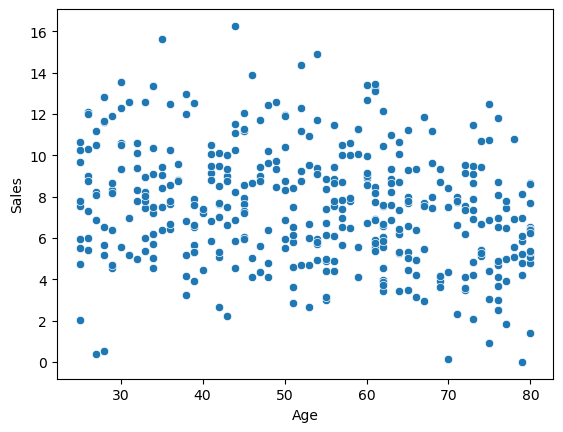

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


In [69]:
eda2_nn(data, target, var)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

상관계수가 절댓값 1보다 훨씬 작으므로 약한 상관 계수를 가진다.

### (5) CompPrice -> Sales

1) 시각화 : scatter

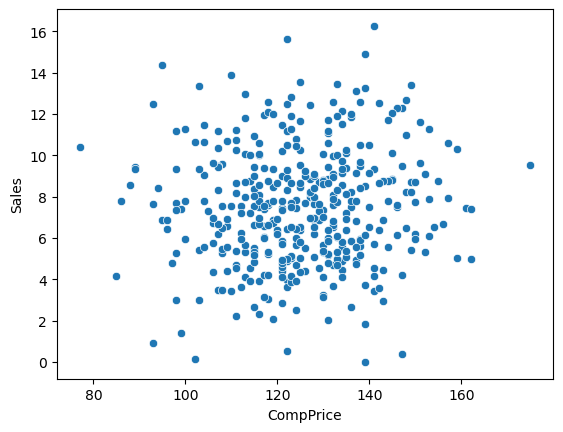

In [70]:
var = 'CompPrice'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

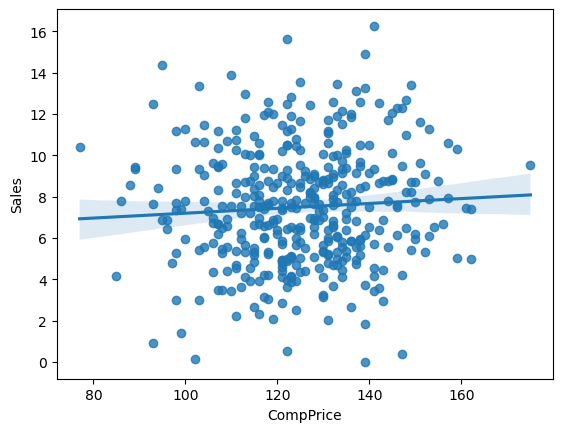

In [71]:
sns.regplot(x=var, y = target, data = data)
plt.show()

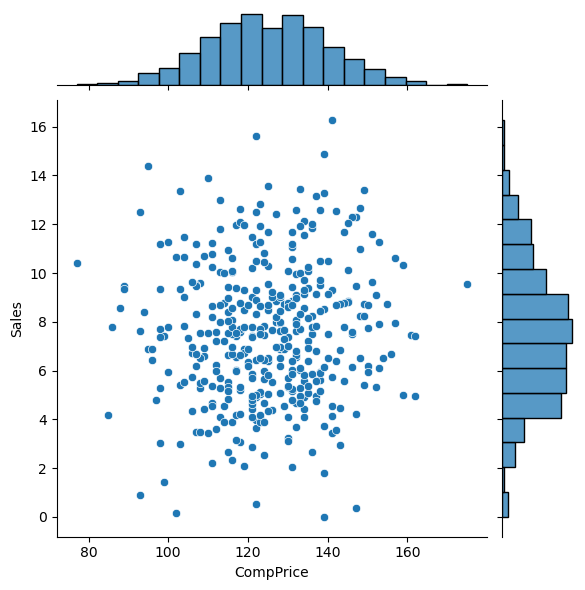

In [72]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [74]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


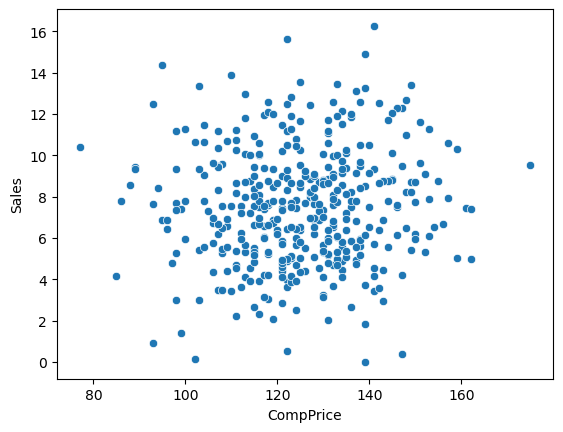

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


In [75]:
eda2_nn(data, target, var)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

상관없음.

- 추가분석!!

In [78]:
data['Diff_Price'] = data['CompPrice'] - data['Price']
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Diff_Price
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


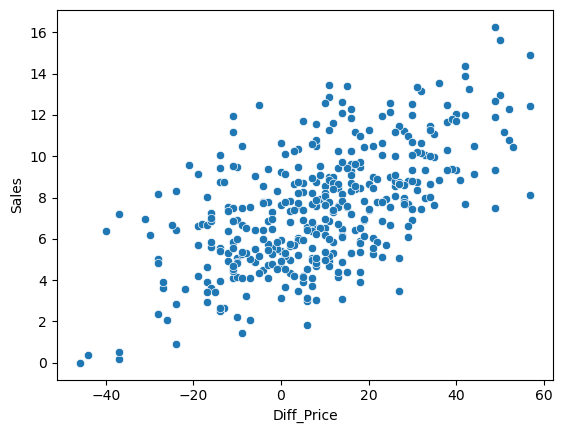

상관계수 : 0.5979217124533921, p-value : 3.877120641788835e-40


In [80]:
eda2_nn(data, target, 'Diff_Price')

**새로 도출해낸 변수는 꽤 높은 상관 관계를 가진다!!**

### (6) Income -> Sales

1) 시각화 : scatter

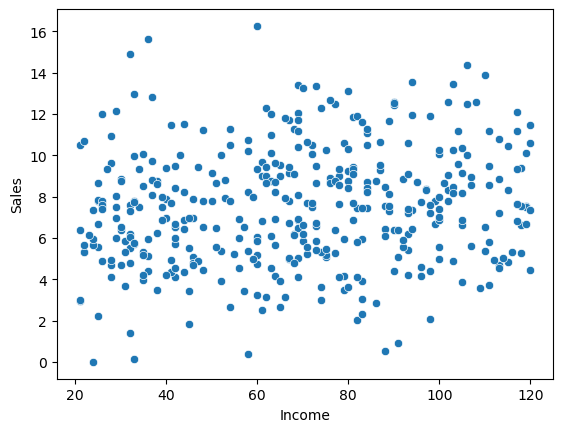

In [39]:
var = 'Income'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

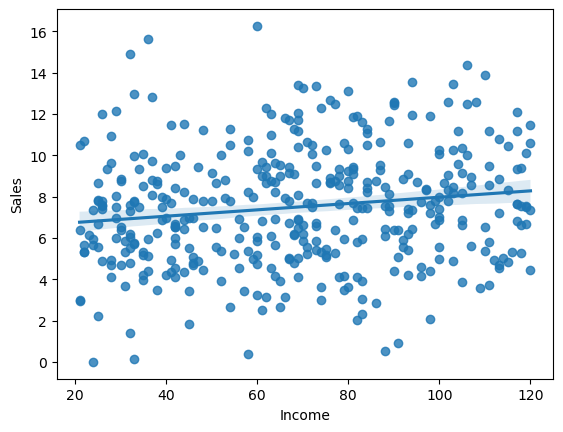

In [40]:
sns.regplot(x=var, y = target, data = data)
plt.show()

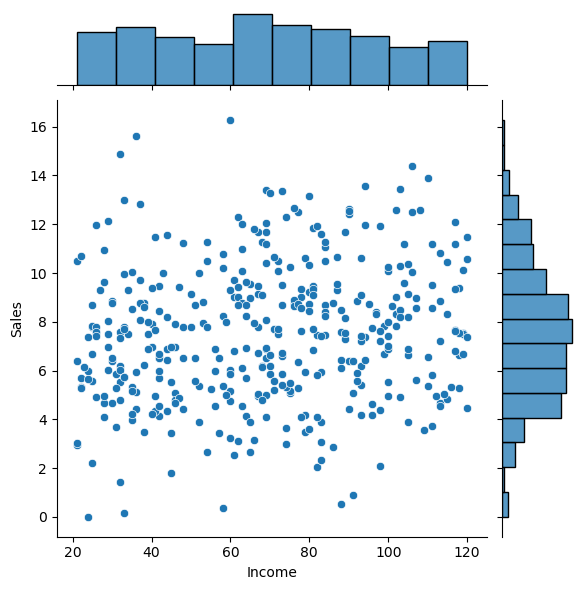

In [41]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [42]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517627


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

상관없음

## 2.범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

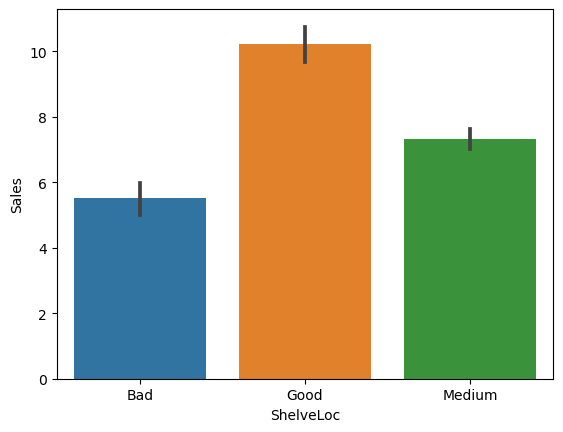

In [43]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [44]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [45]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) Urban -> Sales

1) 시각화 : 평균비교 barplot

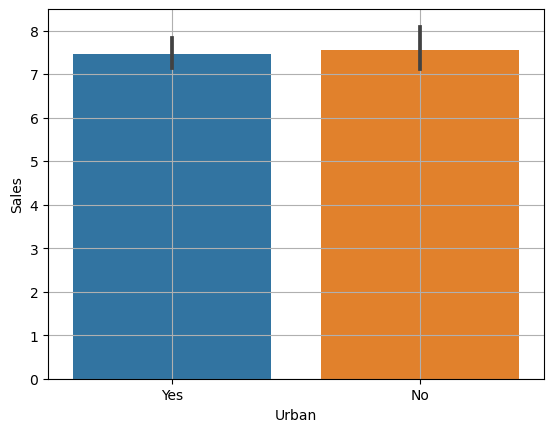

In [90]:
var = 'Urban'

sns.barplot(x=var, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [91]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

In [92]:
d_y = data.loc[data[var]=='Yes', target]
d_n = data.loc[data[var]=='No', target]

spst.f_oneway(d_y, d_n)

F_onewayResult(statistic=0.09465065557659712, pvalue=0.7585069603942085)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

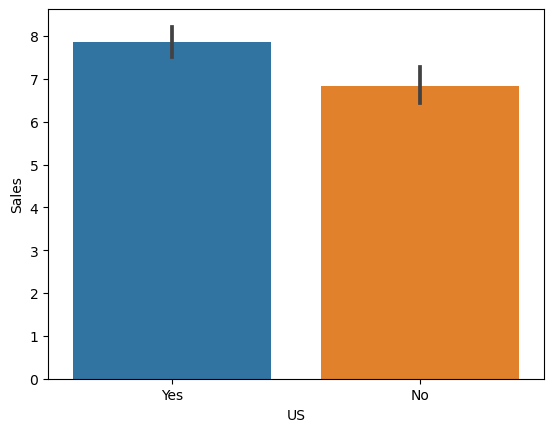

In [93]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [94]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

In [95]:
d_y = data.loc[data[var]=='Yes', target]
d_n = data.loc[data[var]=='No', target]

spst.f_oneway(d_y, d_n)

F_onewayResult(statistic=12.886224277474618, pvalue=0.0003723395870148404)

statistic > 1,2,3이면 유의미한 데이터라고 볼 수도 있다. statistic은 두 평균의 차이이다.

p-value < 0.05 이면 통계량이 유의미하다. 그 반대는 모두 무의미하다.

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## 3.관계 정리하기

① 강한관계

Diff_Price, ShelveLoc (선반진열상태, 가격경쟁력)

② 중간관계

Age, Income, Price, US, Adv (광고비, 자사상품 가격, 평균연령, US)

③ 관계없음

Pop, CompPrice, Urban (인구수, 경쟁사 가격)

In [97]:
path = 'https://bit.ly/3PArw4W'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


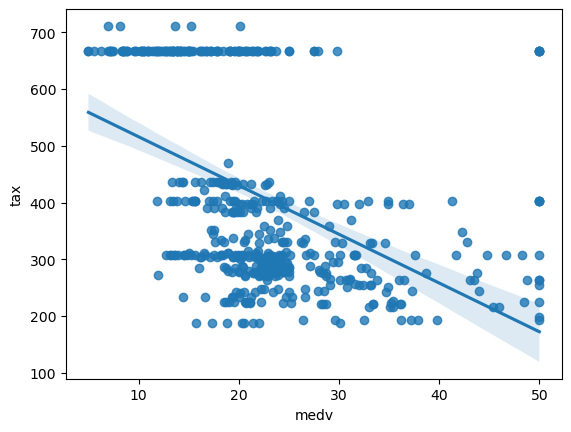

In [99]:
sns.regplot(x='medv', y = 'tax', data = data)
plt.show()

In [100]:
result = spst.pearsonr(data['medv'], data['tax'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4685359335677671, p-value : 5.637733627689083e-29
